In [1]:
import sys, os # , math
# from scipy import stats
import numpy as np
import pandas as pd

# from statistics import mode
# from scipy import stats

sys.path.insert(1, '../src/')
from stat_lib import *

# import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

### Comparando-se o mesmo grupo duas vezes (pareado)

Vamos supor que temos um grupo de pacientes que vão ser medicados. Medimos um determinado marcador (p.ex. glicemia) antes da medicação e depois da medicação. ** Desenho experimental e cálculo de número amostral (N).

A principal pergunta: - O medicmaento fez efeito

Caso a distribuição do biomarcador seja normal, podemos fazer o teste t-student para comparar os dois grupos.

Glicose no sangue (mg/dl)
  - normal: < 99 mg/dl
  - pré-diabético: [100, 125] mg/dl
  - diabético: > 125 mg/dl

In [2]:
MU1 = 140; SSD1 = 15
MU2 = 110; SSD2 = 25

MUs = [MU1, MU2]
SSDs = [SSD1, SSD2]
N = 30
N1=N
N2=N

samp1 = criar_dados_normais(MU1, SSD1, N1)
samp2 = criar_dados_normais(MU2, SSD2, N2)

n1, mu1, q11, med1, q21, mod1, ssd1, mini1, maxi1, stri1, s_quantile1, = \
calc_estatistica_descritiva(samp1, verbose=False)

n2, mu2, q12, med2, q22, mod2, ssd2, mini2, maxi2, stri2, s_quantile2, = \
calc_estatistica_descritiva(samp2, verbose=False)

print("amostra 1", stri1)
print("amostra 2", stri2)

amostra 1 N=30, média=138.49 mediana=138.33 moda=123.33 e ssd=11.84
amostra 2 N=30, média=112.21 mediana=108.21 moda=180.48 e ssd=26.09


In [3]:
mu1, mu2

(np.float64(138.4937090078662), np.float64(112.20733414777058))

### As distribuições são nomais? teste de Shapiro-Wilkis

In [4]:
ret, text, text_stat, stat, pvalue = calc_normalidade_SWT(samp1, alpha = 0.05, NS='NS')
print("Amostra 1", text)
print(text_stat)

Amostra 1 Segundo o teste de Shapiro-Wilk a distribuição se assemelha a uma distribuição normal (aceita-se H0)
p-value 2.20e-01 (NS)


In [5]:
ret, text, text_stat, stat, pvalue = calc_normalidade_SWT(samp2, alpha = 0.05, NS='NS')
print("Amostra 2", text)
print(text_stat)

Amostra 2 Segundo o teste de Shapiro-Wilk a distribuição se assemelha a uma distribuição normal (aceita-se H0)
p-value 7.76e-02 (NS)


### Teste de Shapiro-Wilk

In [6]:
ret1, text1, text_stat1, stat1, pvalue1 = calc_normalidade_SWT(samp1, 0.05, NS='---')
text1, text_stat1

('Segundo o teste de Shapiro-Wilk a distribuição se assemelha a uma distribuição normal (aceita-se H0)',
 'p-value 2.20e-01 (NS)')

In [7]:
ret2, text2, text_stat2, stat2, pvalue2 = calc_normalidade_SWT(samp2, 0.05, NS='---')
text2, text_stat2

('Segundo o teste de Shapiro-Wilk a distribuição se assemelha a uma distribuição normal (aceita-se H0)',
 'p-value 7.76e-02 (NS)')

### As variâncias iguais?
  - dizemos que sim se a diferença entre elas (valor absoluto) for menor que 50% de ssd1

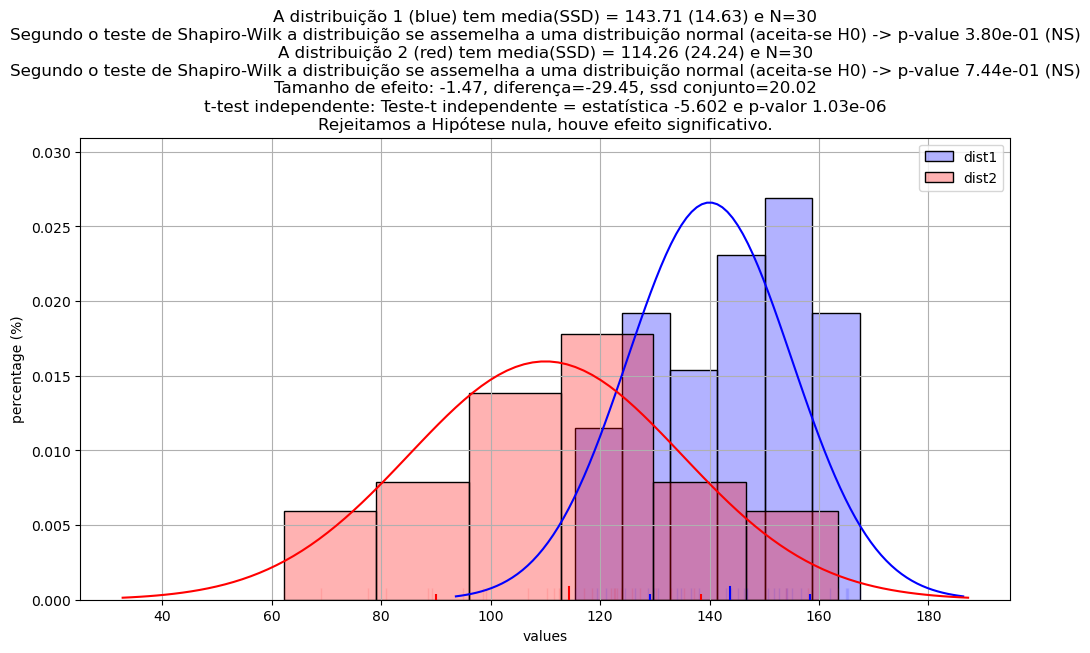

In [8]:
plot_2_distribuições_normais(MUs, SSDs, N1, N2, colors = ['blue', 'red'], figsize=(12, 6))

### Como entendemos este resultado?

  - Controle: pacientes não medicados
  - Case:     pacientes medicados
  
  
  - Se distriuições similares (t-test, diferença próxima a zero - e o intervalo de confiança passa pelo zero) significa que a droga não fez efeito
  - Se distriuições distantes (t-test, intervalo de confiança (IC) longe do zero) significa que a droga fez efeito
    - ter um efeito DESASTROSO, neste caso, se a diferença for positiva
    - ter um efeito BENÉFICO  , neste caso, se a diferença for negativa
  

### O quão distante estão as distribuições???

  - Vamos calcular:
    - Intervalo de confiança
    - Tamanho do efeito (effect size)
    - A diferença entre as médias
    - Mostrar como se apresenta estes resultados

### Relembrando conceitos

#### Teste t

statistician William Sealy Gosset 

<font size="4">t-stat = $\frac{<X>-\mu}{\frac{SSD}{\sqrt(n)}}$</font>

de forma mais generalizada dadas duas distribuições X1 e X2

<font size="4">t-stat = $\frac{<X1>-<X2>}{\sqrt( \frac{var1}{n1} + \frac{var2}{n2}) }$</font>


#### Tamanho do efeito (effect size)

<font size="4">$ES = \frac{media_2 - media_1}{SSD_{pool}}$</font>

https://en.wikipedia.org/wiki/Effect_size


#### Distância entre médias (pode ser negativo)

<font size="4">$diff = media_2 - media_1$</font>


#### SEM - Standard Error of the mean

<font size="4">$SEM = \frac{SSD}{\sqrt{n}}$</font>

